<a href="https://colab.research.google.com/github/BrandonTang95/Flight-Price-Prediction-Project/blob/main/(updated)%20Flight_Prediction_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flight Prediction EDA
* Exploratory Data Analysis for Flight Prediction Dataset

Importing Necessary Libraries and Kaggle Dataset

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.4 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
from geopy.geocoders import Nominatim
from geopy.distance import geodesic
from catboost import CatBoostRegressor
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"danabui","key":"11bbbf2dfee783f8b01d76cb332353bf"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle

In [ ]:
!kaggle datasets download -d shubhambathwal/flight-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 320MB/s]


In [ ]:
import zipfile

with zipfile.ZipFile("flight-price-prediction.zip", "r") as zip_ref:
    zip_ref.extractall("data")

## Exploratory Data Analysis (EDA)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Load data
df = pd.read_csv("/content/data/Clean_Dataset.csv")
unnamed_column = df.columns[0]
df = df.drop(columns=[unnamed_column])

# Quick look
print(df.shape)
print(df.info())
print(df.describe().T)  # numeric + categorical overview

(300153, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB
None
              count          mean           std      min      25%      50%  \
duration   300153.0     12.221021      7.191997     0.83     6.83    11.25   
days_left  300153.0     26.0

Libraries for visualizations

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# theme
sns.set_theme(
    style="whitegrid",
    font_scale=1.25,
    rc={
        "figure.figsize": (11, 6),
        "axes.titlesize": 18,
        "axes.labelsize": 15,
        "axes.edgecolor": "#333333",
        "axes.linewidth": 1.2,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
    }
)

# color palette
palette = ["#4575b4", "#91bfdb", "#fee090", "#fc8d59", "#d73027"]

### Univariate Analysis

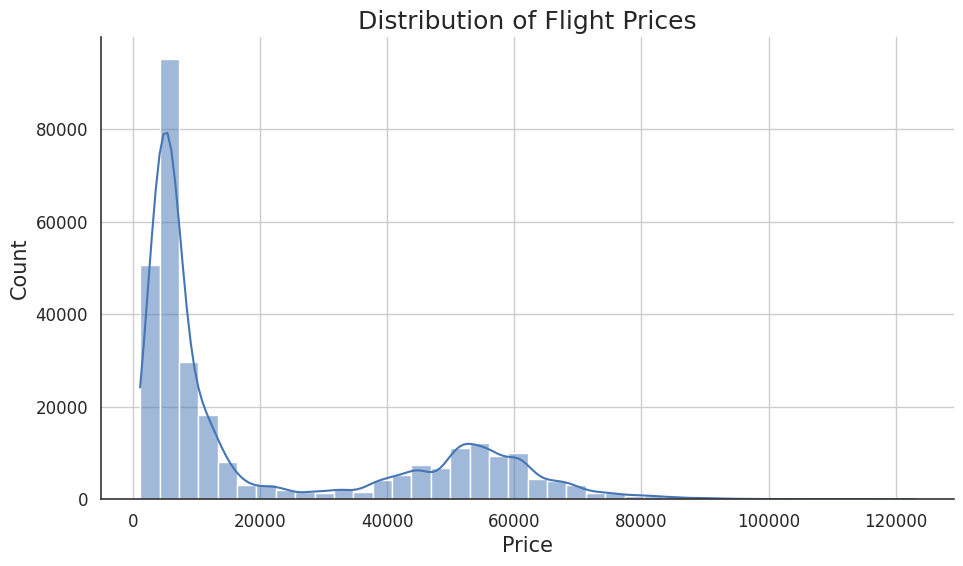

In [ ]:
# histogram & kde of price distribution
plt.figure()
sns.histplot(df["price"], bins=40, kde=True, color="#4575b4")
plt.title("Distribution of Flight Prices")
plt.xlabel("Price")
plt.ylabel("Count")
sns.despine()
plt.show()

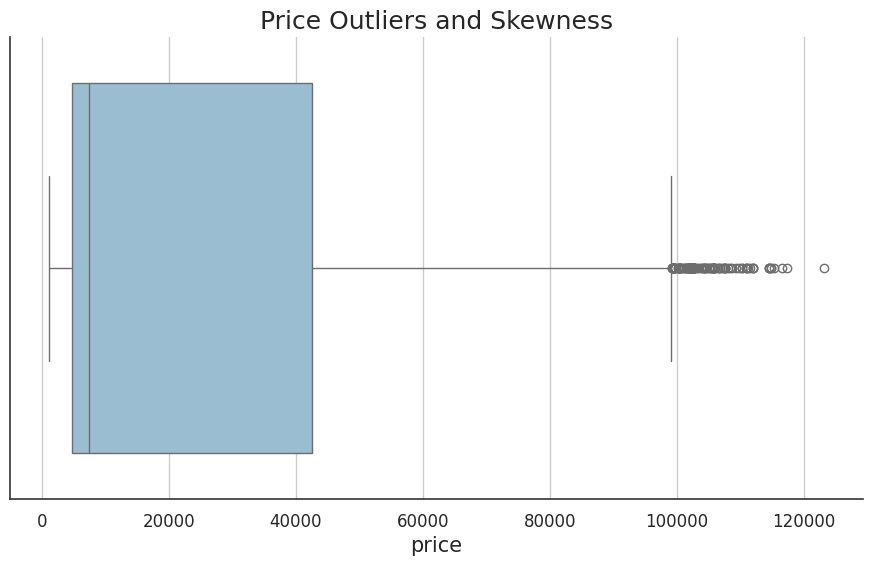

In [ ]:
# price with outliers and skewness
plt.figure()
sns.boxplot(x=df["price"], color="#91bfdb")
plt.title("Price Outliers and Skewness")
sns.despine()
plt.show()

/tmp/ipython-input-2750701175.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/tmp/ipython-input-2750701175.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(


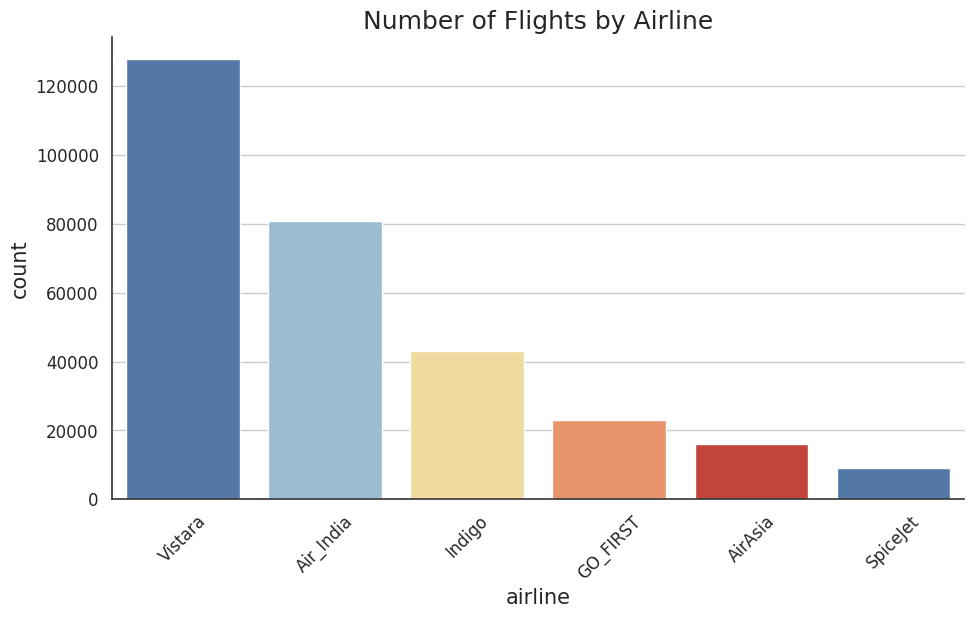

In [ ]:
# number of flights by airline
plt.figure()
sns.countplot(
    data=df,
    x="airline",
    order=df["airline"].value_counts().index,
    palette=palette
)
plt.title("Number of Flights by Airline")
plt.xticks(rotation=45)
sns.despine()
plt.show()

/tmp/ipython-input-1520027372.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="class", palette=["#4575b4", "#fc8d59"])


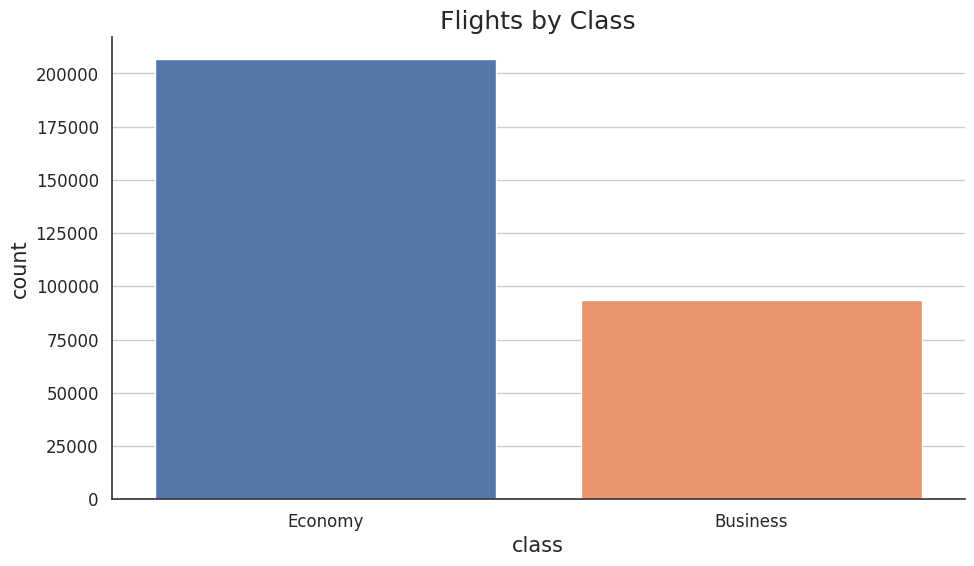

In [ ]:
# class countplot
plt.figure()
sns.countplot(data=df, x="class", palette=["#4575b4", "#fc8d59"])
plt.title("Flights by Class")
sns.despine()
plt.show()

### Bivariate Analysis

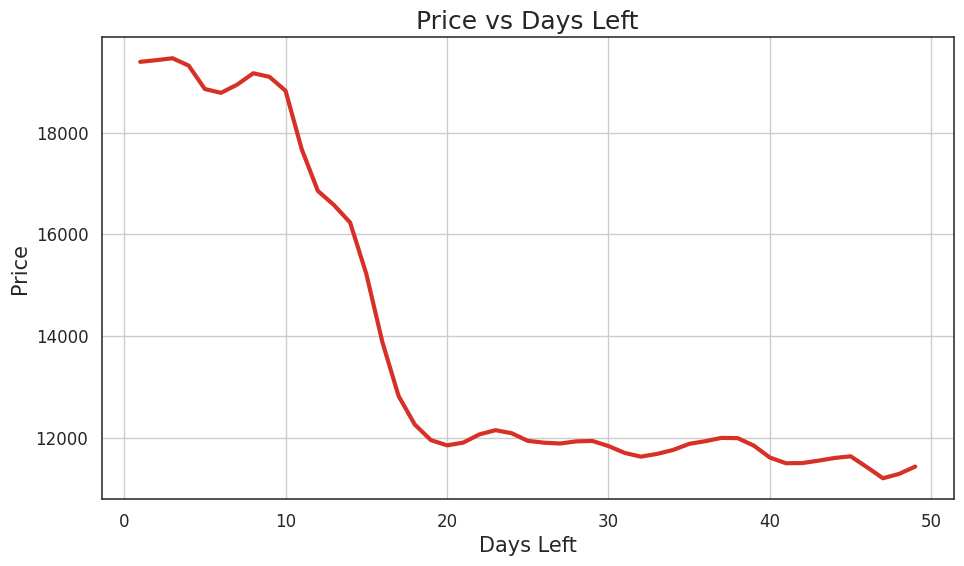

In [ ]:
# curve of prices vs days left
lowess_curve = lowess(df["price"], df["days_left"], frac=0.1)
plt.figure()
plt.plot(lowess_curve[:, 0], lowess_curve[:, 1], color="#d73027", linewidth=3)
plt.title("Price vs Days Left")
plt.xlabel("Days Left")
plt.ylabel("Price")
plt.show()

/tmp/ipython-input-459397526.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="airline", y="price", palette=palette)
/tmp/ipython-input-459397526.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(data=df, x="airline", y="price", palette=palette)


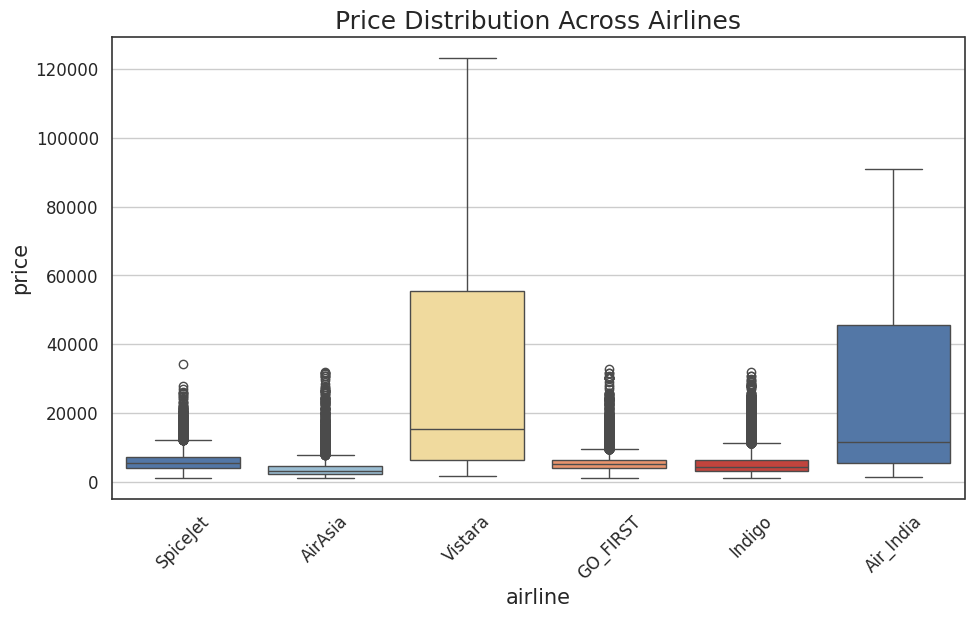

In [ ]:
# airline vs price
plt.figure()
sns.boxplot(data=df, x="airline", y="price", palette=palette)
plt.title("Price Distribution Across Airlines")
plt.xticks(rotation=45)
plt.show()

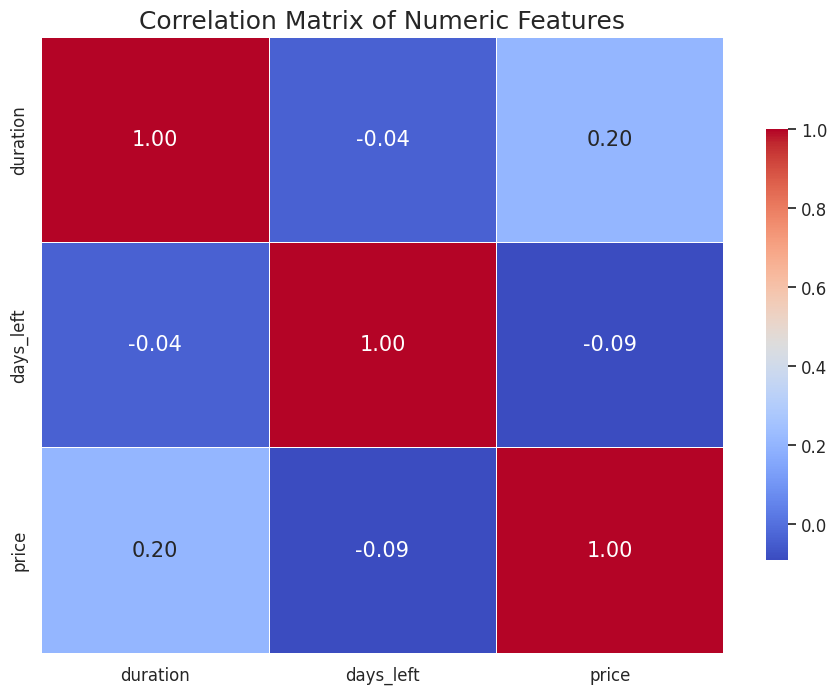

In [ ]:
# numeric correlations
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

plt.figure(figsize=(11, 8))
sns.heatmap(
    df[numeric_cols].corr(),
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Correlation Matrix of Numeric Features")
plt.show()

In [ ]:
df = pd.read_csv('/content/data/Clean_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


From this, we can see that the price is pretty similar even though the instances all have different feature values.

In [ ]:
missing_values = df.isnull().sum()
duplicates = df.duplicated().sum()

print("Missing Values:", missing_values)
print("\nNumber of Duplicates:", duplicates)

Missing Values: Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Number of Duplicates: 0


We have no duplicates or missing values in our dataset so we can start looking at trends in the data.

# Questions and Diagrams
How does the price of flights vary with the date and time you buy a ticket?

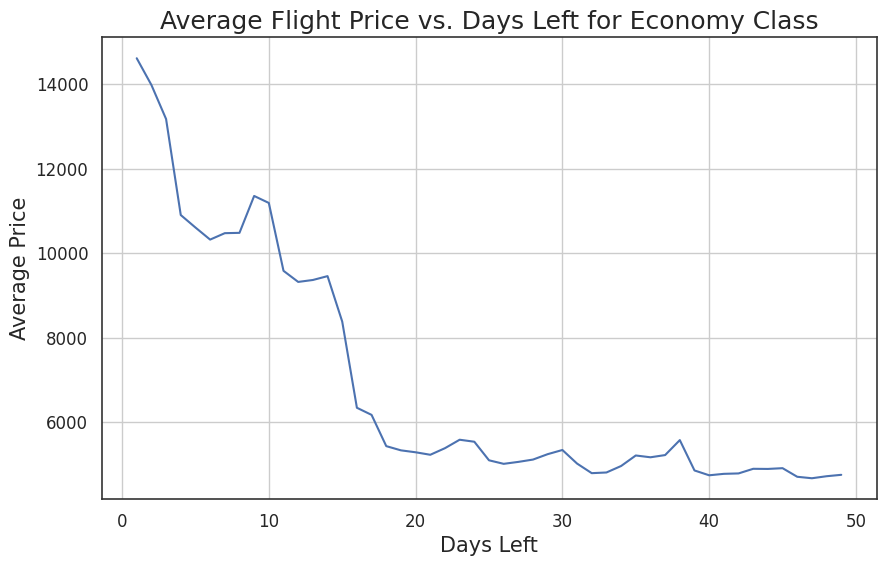

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

economy_df = df[df['class'] == 'Economy']

price_by_days = economy_df.groupby('days_left')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=price_by_days)
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.title('Average Flight Price vs. Days Left for Economy Class')
plt.grid(True)
plt.savefig("price-by-days-left.png")
plt.show()

We can see that the price is a lot higher when there are less days left for economy.

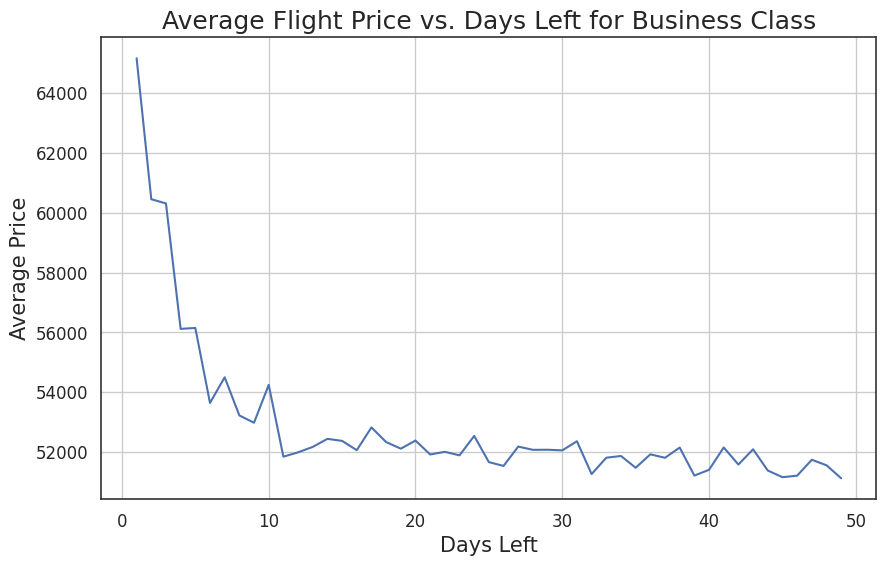

In [ ]:
business_df = df[df['class'] == 'Business']

price_by_days = business_df.groupby('days_left')['price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='days_left', y='price', data=price_by_days)
plt.xlabel('Days Left')
plt.ylabel('Average Price')
plt.title('Average Flight Price vs. Days Left for Business Class')
plt.grid(True)
plt.savefig("price-by-days-left-business.png")
plt.show()

This chart shows a similar trend but since Business is a lot more expensive in general, the prices are a lot less when there are more days left compared to when there are few days left.

/tmp/ipython-input-2226512580.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


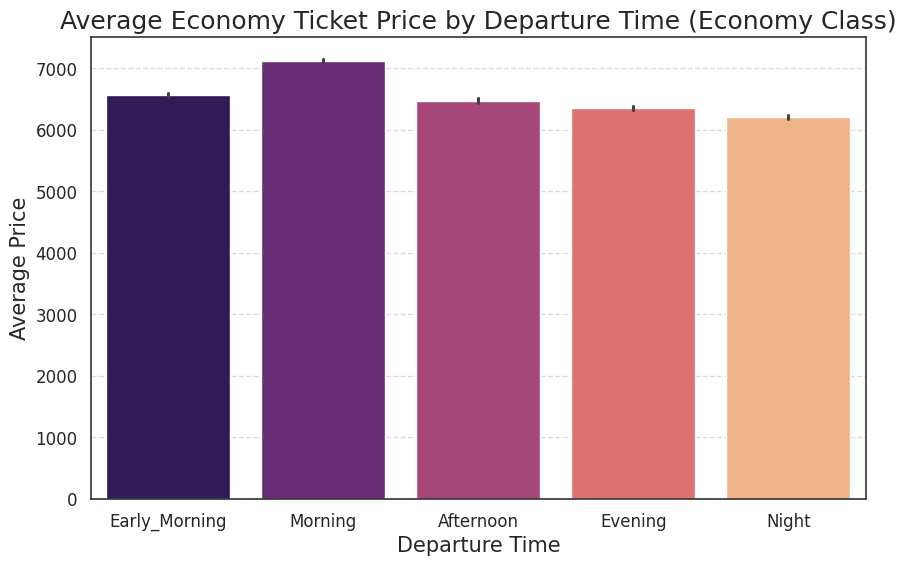

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

economy_df = df[df['class'] == 'Economy'].copy()

economy_df['departure_time'].value_counts()

categories = ['Early_Morning','Morning', 'Afternoon', 'Evening', 'Night']
economy_df['departure_time'] = pd.Categorical(economy_df['departure_time'], categories = categories, ordered = True)

plt.figure(figsize=(10,6))
sns.barplot(
    data = economy_df,
    x = 'departure_time',
    y = 'price',
    palette = 'magma',
    errorbar = ('ci', 95)
)

plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Economy Ticket Price by Departure Time (Economy Class)')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.savefig("price-by-departure-time.png")
plt.show()



There is likely a significant decreasing trend as the economy tickets are scheduled earlier in the day to later with the exception of tickets with early morning departure times.

/tmp/ipython-input-1078813727.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


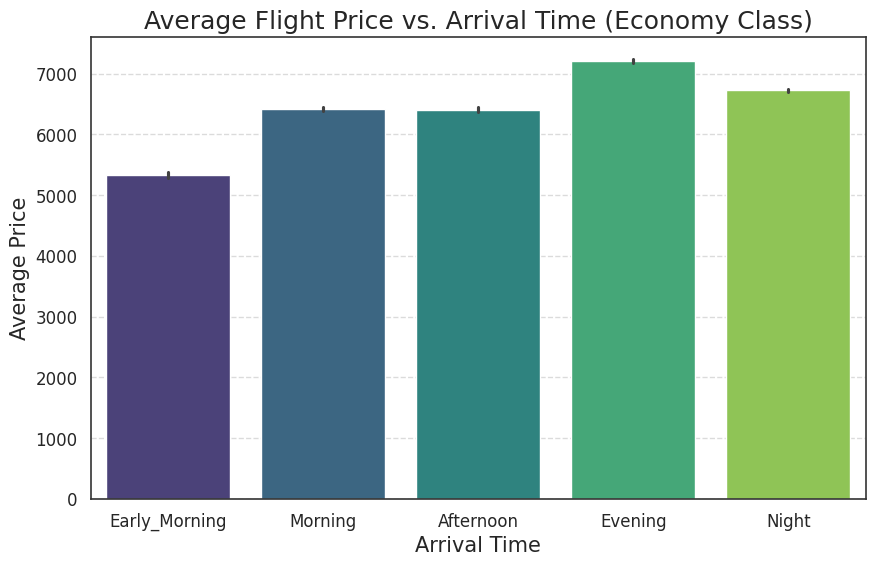

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

economy_df = df[df['class'] == 'Economy'].copy()

economy_df['arrival_time'].value_counts()

time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
economy_df['arrival_time'] = pd.Categorical(economy_df['arrival_time'], categories=time_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data = economy_df,
    x='arrival_time',
    y='price',
    palette = 'viridis',
    errorbar = ('ci', 95))

plt.xlabel('Arrival Time')
plt.ylabel('Average Price')
plt.title('Average Flight Price vs. Arrival Time (Economy Class)')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.savefig("price-by-arrival-time.png")
plt.show()


The most expensive tickets are scheduled for evening arrival times. The second most expensive are night arrival tickers. There is likely no significant difference between morning and afternoon. Early Morning tickets are the relatively the cheapest.

/tmp/ipython-input-3037532726.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


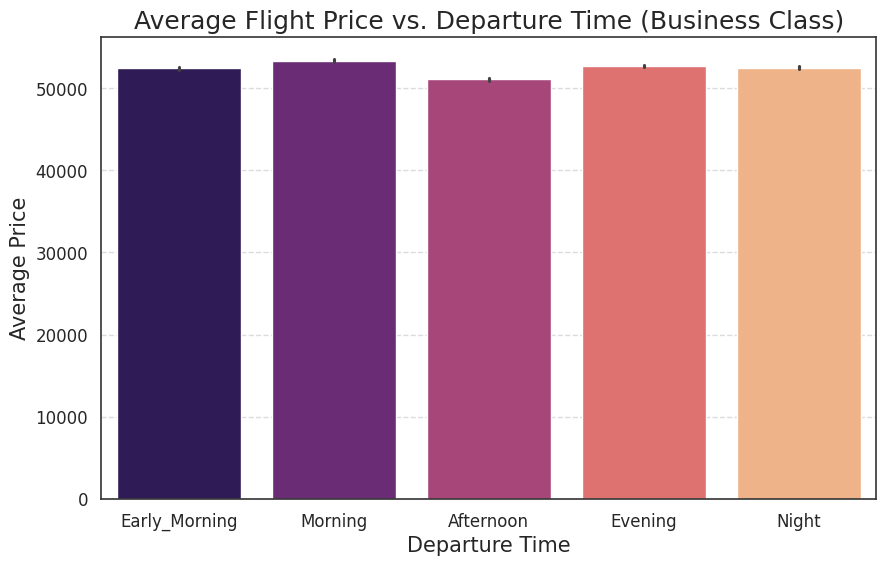

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

business_df = df[df['class'] == 'Business'].copy()

business_df['departure_time'].value_counts()

time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
business_df['departure_time'] = pd.Categorical(business_df['departure_time'], categories=time_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data = business_df,
    x='departure_time',
    y='price',
    palette = 'magma',
    errorbar = ('ci', 95))

plt.xlabel('Departure Time')
plt.ylabel('Average Price')
plt.title('Average Flight Price vs. Departure Time (Business Class)')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.savefig("price-by-arrival-time.png")
plt.show()

The Business class ticket prices seem to have less variance with their prices, with Morning-scheduled tickets being the most expensive still. However, evening and night tickets are more expensive than afternoon tickets contrary to the decreasing trend with the economy class ticket prices.

/tmp/ipython-input-1823886510.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


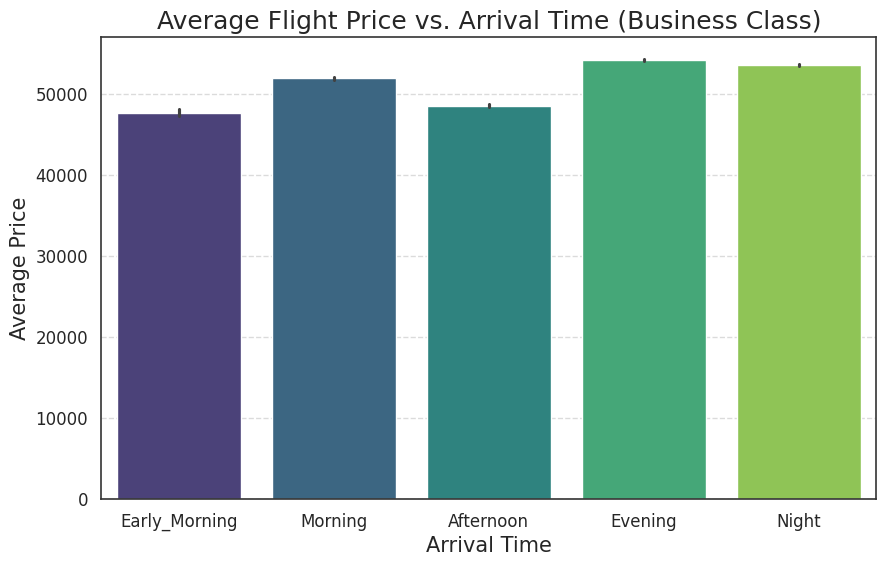

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

business_df = df[df['class'] == 'Business'].copy()

business_df['arrival_time'].value_counts()

time_order = ['Early_Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
business_df['arrival_time'] = pd.Categorical(business_df['arrival_time'], categories=time_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(
    data = business_df,
    x='arrival_time',
    y='price',
    palette = 'viridis',
    errorbar = ('ci', 95))

plt.xlabel('Arrival Time')
plt.ylabel('Average Price')
plt.title('Average Flight Price vs. Arrival Time (Business Class)')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.savefig("price-by-arrival-time.png")
plt.show()

Business arrival time tickets compare to one another similarly to Economy arrival time ticket prices: evening times are still the most expensive and early morning times are still the cheapest. However, morning arrival time tickets are drastically higher than afternoon arrival times; compared to economy class tickets, morning and afternoon ticket prices were approximately similar.

# Feature Engineering
1. Feature selection to find best features for predicting price

Setting up feature classes and target class

In [ ]:
!pip install catboost

In [ ]:
# drop id class since catboost will think it influences price
df = pd.read_csv('/content/data/Clean_Dataset.csv')
df = df.drop(df.columns[0], axis=1)

X = df.drop("price", axis=1)
y = df["price"]

cat_cols = X.select_dtypes(include=["object"]).columns
cat_inds = [X.columns.get_loc(col) for col in cat_cols]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from catboost import Pool

train_pool = Pool(X_train, y_train, cat_features=cat_inds)
test_pool = Pool(X_test, y_test, cat_features=cat_inds)

In [ ]:
from catboost import CatBoostRegressor

model = CatBoostRegressor(
    iterations=800,
    learning_rate=0.05,
    depth=10,
    loss_function="RMSE",
    verbose=100
)

model.fit(train_pool, eval_set=test_pool)

0:	learn: 21637.0405534	test: 21642.5715905	best: 21642.5715905 (0)	total: 1.22s	remaining: 16m 16s
100:	learn: 3919.9272649	test: 3959.1513610	best: 3959.1513610 (100)	total: 1m 18s	remaining: 9m 6s
200:	learn: 3425.1707756	test: 3464.5649729	best: 3464.5649729 (200)	total: 2m 38s	remaining: 7m 52s
300:	learn: 3152.6685499	test: 3207.2390261	best: 3207.2390261 (300)	total: 4m	remaining: 6m 39s
400:	learn: 2968.7751929	test: 3040.9676660	best: 3040.9676660 (400)	total: 5m 24s	remaining: 5m 22s
500:	learn: 2830.3053439	test: 2918.0473771	best: 2918.0473771 (500)	total: 6m 44s	remaining: 4m 1s
600:	learn: 2729.6497487	test: 2834.2883768	best: 2834.2883768 (600)	total: 8m 8s	remaining: 2m 41s
700:	learn: 2645.1783104	test: 2766.6423785	best: 2766.6423785 (700)	total: 9m 29s	remaining: 1m 20s
799:	learn: 2575.7526964	test: 2712.1127958	best: 2712.1127958 (799)	total: 10m 50s	remaining: 0us

bestTest = 2712.112796
bestIteration = 799



Finding Importance of each feature

In [ ]:
importances = model.get_feature_importance(train_pool)
feature_names = X.columns

for name, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(f"{name}: {imp:.3f}")

class: 84.596
duration: 2.907
destination_city: 2.321
airline: 2.298
source_city: 1.904
days_left: 1.607
stops: 1.606
flight: 1.483
arrival_time: 0.696
departure_time: 0.581


# Model Building

Installing geopy for distance between airports and catboost for model

In [ ]:
!pip install geopy

In [ ]:
import pandas as pd
cities = pd.unique(df[['source_city', 'destination_city']].values.ravel())
#convert array to list
citylist = list(cities)

#put a citys' coordinates into librbary
geolocator = Nominatim(user_agent="flight_app")

airport_coords = {}
airport_prices = {}

for airport in citylist: #accessing airport coordinates and prices of each ticket
  location = geolocator.geocode(f"{airport}, India")
  price = df[df['source_city'] == airport]['price'].tolist()
  airport_prices[airport] = price
  if location:
    airport_coords[airport] = (location.latitude, location.longitude)


In [ ]:
# getting a city's average ticket price/km
total = {}
for idx, row in df.iterrows():
  source = row['source_city']
  destination = row['destination_city']
  price = row['price']
  if source in airport_coords and destination in airport_coords:

    source_coords = airport_coords[source]
    destination_coords = airport_coords[destination]
    distance = geodesic(source_coords, destination_coords).km
    price_per_km = price / distance

    if source not in total:
      total[source] = {'sum': 0, 'count': 0}
    total[source]['sum'] += price_per_km
    total[source]['count'] += 1

avg_per_city = {city: total[city]['sum'] / total[city]['count'] for city in total}

print(avg_per_city)


{'Delhi': 13.667215389251846, 'Mumbai': 22.061737715885204, 'Bangalore': 29.673675803511014, 'Kolkata': 15.361683984762488, 'Hyderabad': 29.28254520797205, 'Chennai': 32.2136219809046}


/tmp/ipython-input-2074928915.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p_km = sns.barplot(


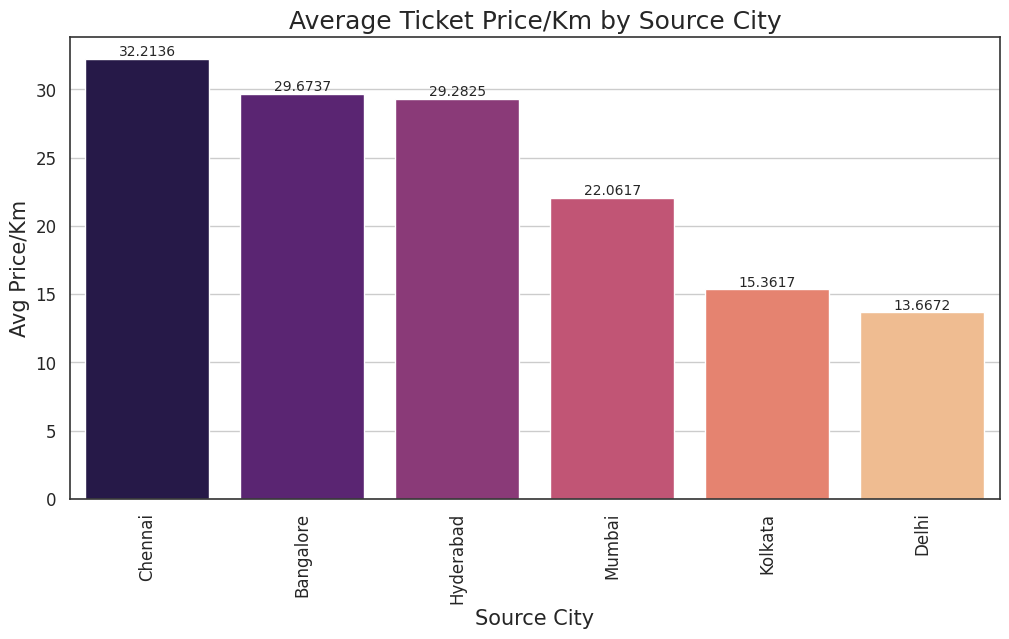

In [ ]:
#comparing each citys' average price/km

df_avg = pd.DataFrame(list(avg_per_city.items()), columns=['Source City', 'Avg Price/Km'])
df_avg = df_avg.sort_values('Avg Price/Km', ascending=False)

plt.figure(figsize=(12,6))
p_km = sns.barplot(
    x = 'Source City',
    y = 'Avg Price/Km',
    data = df_avg,
    palette = "magma"
)
p_km.bar_label(p_km.containers[0], fontsize = 10)
p_km.bar_label(p_km.containers[1], fontsize = 10)
p_km.bar_label(p_km.containers[2], fontsize = 10)
p_km.bar_label(p_km.containers[3], fontsize = 10)
p_km.bar_label(p_km.containers[4], fontsize = 10)
p_km.bar_label(p_km.containers[5], fontsize = 10)
plt.xticks(rotation=90)
plt.title("Average Ticket Price/Km by Source City")
plt.show()

/tmp/ipython-input-3210961613.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  s_c = sns.barplot(


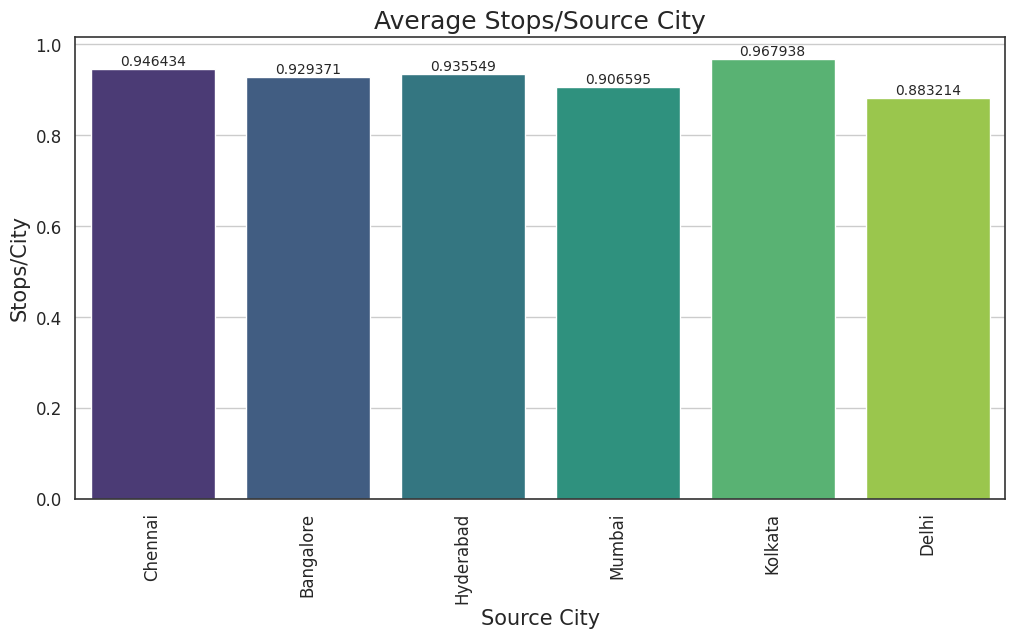

In [ ]:
#comparing each city's average amount of stops
converted_stops = df['stops'].map({'zero': 0, 'one': 1, 'two_or_more': 2})
avg_stops_per_city = df.groupby('source_city')['stops'].apply(
    lambda x: x.map({'zero':0,'one':1,'two_or_more':2}).mean()
)

# Keep only the columns you actually need
df_avg = df_avg[['Source City', 'Avg Price/Km']]
avg_stops_per_city = avg_stops_per_city.rename("Stops/City")
df_avg = df_avg.merge(
    avg_stops_per_city,
    left_on='Source City',
    right_index=True
)


plt.figure(figsize=(12,6))
s_c = sns.barplot(
    x = 'Source City',
    y = 'Stops/City',
    data = df_avg,
    palette = "viridis"
)
s_c.bar_label(s_c.containers[0], fontsize = 10)
s_c.bar_label(s_c.containers[1], fontsize = 10)
s_c.bar_label(s_c.containers[2], fontsize = 10)
s_c.bar_label(s_c.containers[3], fontsize = 10)
s_c.bar_label(s_c.containers[4], fontsize = 10)
s_c.bar_label(s_c.containers[5], fontsize = 10)
plt.xticks(rotation=90)
plt.title("Average Stops/Source City")
plt.show()

Categorizing each citys' accessibility

In [ ]:
#PRICE/KM
avgs = list(avg_per_city.values())
avg_threshold = np.median(avgs)

#NUMBER OF STOPS/CITY
stops_threshold = np.median(df_avg['Stops/City'])


#Categorizing
df_avg['Accessible'] = (
    (df_avg['Avg Price/Km'] > avg_threshold) |
    (df_avg['Stops/City'] > stops_threshold)).astype(int)

print(df_avg[['Source City', 'Avg Price/Km', 'Stops/City', 'Accessible']])
# where 0 is accessible pricing and 1 is not accessible

  Source City  Avg Price/Km  Stops/City  Accessible
5     Chennai     32.213622    0.946434           1
2   Bangalore     29.673676    0.929371           1
4   Hyderabad     29.282545    0.935549           1
1      Mumbai     22.061738    0.906595           0
3     Kolkata     15.361684    0.967938           1
0       Delhi     13.667215    0.883214           0


In [ ]:

#                            ╱|、
#                          (˚ˎ 。7
#                           |、˜〵
#                          じしˍ,)ノ

#Random Forest Resgressor Model

In [ ]:
#onehot coding for categorical data

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis=1), df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
ctg_cols = ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), ctg_cols)
    ],
    remainder = 'passthrough' #keeping numerical categories
)

reg = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', RandomForestRegressor(
                            n_estimators=100,
                            random_state=42,
                            n_jobs=-1)
                        )])

reg.fit(X_train, y_train)

In [ ]:
reg.score[X_test, y_test]

#Evaluation

In [ ]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = reg.predict(X_test)

print('r2 score: ', r2_score(y_test, y_pred))
print('mean abs error: ', (y_test, y_pred))
print('mean squared error: ', mean_squared_error(y_test, y_pred))
print('root mean squared error: ', math.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Ticket Price')
plt.ylabel('Predicted Ticket Price')
plt.title('Prediction vs Actual Price (₹)')